In [1]:
import pandas as pd
from database_handler import execute_query,create_connection,return_data_as_df
from lookups import InputTypes

db_session = create_connection()
query = """ SELECT * FROM dw_reporting.dim_gdp_all_measures
 """

df = return_data_as_df(query,InputTypes.SQL,db_session)
df

c:\Users\user\OneDrive\Documents\SE_Factory\FSD\Final_Project\usa_recession_analysis\database_handler.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return_dataframe = pd.read_sql_query(con= db_session, sql= file_executor)


,date,gdp,pce,gpdi,netexp,gcec,impgs
0,2007-01-01,16611.690,28716.4,2664.295,-739.273,3299.115,2317.264
1,2007-04-01,16713.314,29036.2,2699.217,-745.806,3329.139,2368.569
2,2007-07-01,16809.587,29395.1,2685.969,-728.954,3344.222,2414.664
3,2007-10-01,16915.191,29811.4,2642.560,-729.699,3370.950,2480.413
4,2008-01-01,16843.003,30013.4,2563.701,-771.248,3378.654,2584.568
...,...,...,...,...,...,...,...
61,2022-04-01,21708.160,52245.3,4739.049,-1025.567,3641.161,4069.839
62,2022-07-01,21851.134,53052.6,4724.621,-892.026,3666.982,3976.524
63,2022-10-01,21989.981,53751.2,4796.162,-877.204,3714.800,3891.004
64,2023-01-01,22112.329,54808.7,4725.828,-825.687,3758.768,3890.491


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


In [3]:
# Assuming your data is in a DataFrame named 'df'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [5]:
# You can use the adfuller function from statsmodels for the ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['gdp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.6853868216176305
p-value: 0.9895416810729587


In [58]:
# Example of differencing
df['gdp_diff'] = df['gdp'].diff()


In [69]:
pd.set_option('display.max_rows', None)


In [70]:
df['gdp_diff']

date
2007-01-01         NaN
2007-04-01     101.624
2007-07-01      96.273
2007-10-01     105.604
2008-01-01     -72.188
2008-04-01     100.288
2008-07-01     -88.996
2008-10-01    -368.945
2009-01-01    -187.088
2009-04-01     -29.117
2009-07-01      57.136
2009-10-01     176.473
2010-01-01      79.956
2010-04-01     160.452
2010-07-01     129.104
2010-10-01      88.598
2011-01-01     -40.232
2011-04-01     114.482
2011-07-01      -3.801
2011-10-01     191.270
2012-01-01     144.427
2012-04-01      77.515
2012-07-01      25.125
2012-10-01      20.202
2013-01-01     172.548
2013-04-01      47.271
2013-07-01     150.779
2013-10-01     155.697
2014-01-01     -62.173
2014-04-01     231.937
2014-07-01     221.030
2014-10-01      93.090
2015-01-01     166.590
2015-04-01     115.622
2015-07-01      75.175
2015-10-01      34.788
2016-01-01     109.484
2016-04-01      61.019
2016-07-01     135.229
2016-10-01     106.414
2017-01-01      93.991
2017-04-01     108.606
2017-07-01     153.817
2017-1

In [6]:
result_diff = adfuller(df['gdp_diff'].dropna())
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

KeyError: 'gdp_diff'

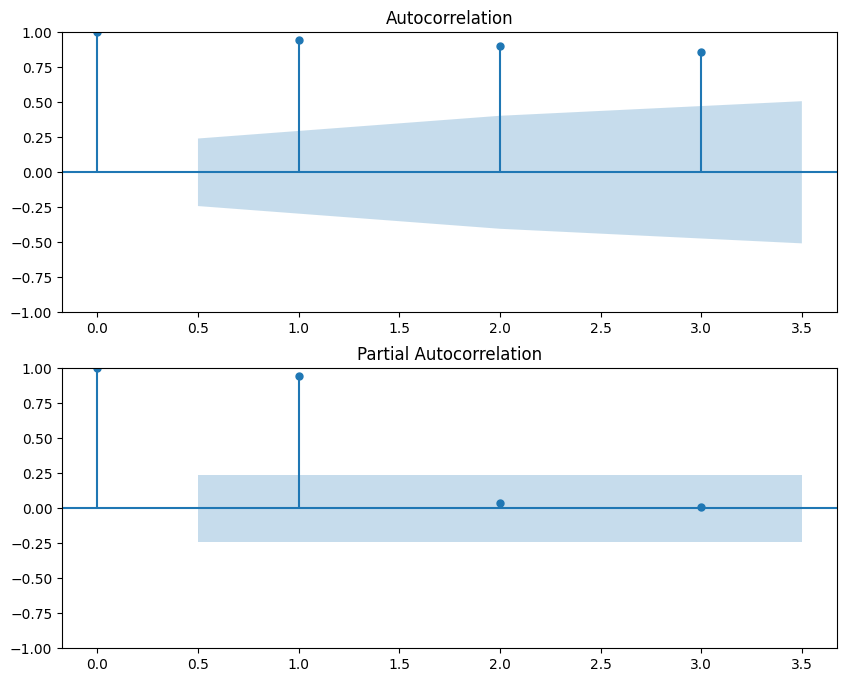

In [10]:
pd.reset_option('display.max_rows')

# Example of ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df['gdp'].dropna(), lags=3, ax=ax1)
plot_pacf(df['gdp'].dropna(), lags=3, ax=ax2)

plt.show()


In [11]:
# Example of fitting an ARIMA model
order = (3, 0, 2)  # Replace p, d, q with the determined values
model = ARIMA(df['gdp'], order=order)
fit_model = model.fit()


c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\anaconda3\envs\sefactory_env\lib\

In [12]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Example of making predictions
future_date = datetime(2023,7,1)

future_date

datetime.datetime(2023, 7, 1, 0, 0)

In [13]:
future_dates = []
for _ in range(12):
    future_date += relativedelta(months=3)
    future_dates.append(future_date)
future_dates

[datetime.datetime(2023, 10, 1, 0, 0),
 datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2024, 4, 1, 0, 0),
 datetime.datetime(2024, 7, 1, 0, 0),
 datetime.datetime(2024, 10, 1, 0, 0),
 datetime.datetime(2025, 1, 1, 0, 0),
 datetime.datetime(2025, 4, 1, 0, 0),
 datetime.datetime(2025, 7, 1, 0, 0),
 datetime.datetime(2025, 10, 1, 0, 0),
 datetime.datetime(2026, 1, 1, 0, 0),
 datetime.datetime(2026, 4, 1, 0, 0),
 datetime.datetime(2026, 7, 1, 0, 0)]

In [14]:


forecast = fit_model.get_forecast(steps=len(future_dates))
forecast_index = pd.DatetimeIndex(future_dates)

forecast_values = forecast.predicted_mean
forecast_df = pd.DataFrame({'GDP Forecast': forecast_values}, index=forecast_index)

print(forecast_df)


            GDP Forecast
2023-10-01  22173.092224
2024-01-01  22154.906427
2024-04-01  22132.735305
2024-07-01  22115.344008
2024-10-01  22094.380991
2025-01-01  22076.021253
2025-04-01  22056.254224
2025-07-01  22037.458213
2025-10-01  22018.324362
2026-01-01  21999.519521
2026-04-01  21980.730570
2026-07-01           NaN
